### АНАЛИЗ РЕПРЕЗЕНТАТИВНОСТИ ТЕСТОВОЙ ВЫБОРКИ TARGET-CLASS

проверка репрезентативности выборки target- class с помощью анализа распределения фичей с помощью qq-plot и ecdf
  
Входные данные
- data/interm/target_features.pkl из feature_engineering.ipynb уже рассчитанные фичи обучающей выборки
- data/interm/features_mdm.pkl рассчитанные фичи для моделей

In [17]:
import pandas as pd

In [18]:
pre = '../../' # путь до главной директории проекта

%run ../init.ipynb #подгрузить нужные библиотеки
%run ../params.ipynb #параметры как логин пароль к БИ, параметры расчёта ( в нашем случае их нет)
%run ../init_mdm.ipynb
%run ../preprocessing/preprocessing_target.ipynb
%run ../ML_functions.ipynb
%run ../auxiliary/plots.ipynb

In [19]:
# сюда таблицы будем кидать, для отчетов
name = pre + "data/interm/auxilary/feature_representativeness.xlsx"
writer = ExcelWriter(name)

In [20]:
name = pre + "data/interm/features_mdm.pkl"
features_mdm = pd.read_pickle(name, compression={'method':'zip'})

print("Размер считанных данных mdm features- {}".format(features_mdm.shape))
# features_mdm.head(1)

Размер считанных данных mdm features- (229912, 29)


In [21]:
name = pre + "data/interm/target_features.pkl"
df_target_features = pd.read_pickle(name, compression={'method':'zip'})

print("Размер считанных фичей features target_class - {}".format(df_target_features.shape))
# df_target_features.head(1)

Размер считанных фичей features target_class - (85798, 39)


#### Теперь формируем выборки для фрод дефолта

In [22]:
target_frod = Target(type='фрод', target_data=df_target_features) # это фрод дефолт, макс по обращению

target_frod.print_param()

# target_frod.data.head(2)


Параметры обработанной таблицы портфеля рисков  по обращениям:
	фрод дефолт = 1  у выборки 4708 из 63131 (7.46%)


In [23]:
features_target = target_frod.data

## Заполним пустые значения в фичах

In [24]:
for delta_col in features_target.columns:
    if (is_timedelta64_dtype(features_target[delta_col])):
       features_target[delta_col] = features_target[delta_col].dt.days
       features_target[delta_col] = features_target[delta_col].fillna(0)

for delta_col in features_mdm.columns:
    if (is_timedelta64_dtype(features_mdm[delta_col])):
       features_mdm[delta_col] = features_mdm[delta_col].dt.days
       features_mdm[delta_col] = features_mdm[delta_col].fillna(0)

# features_target.head(1)

## сравниваем распределения на q-q plot

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:00<00:00, 32.82it/s]


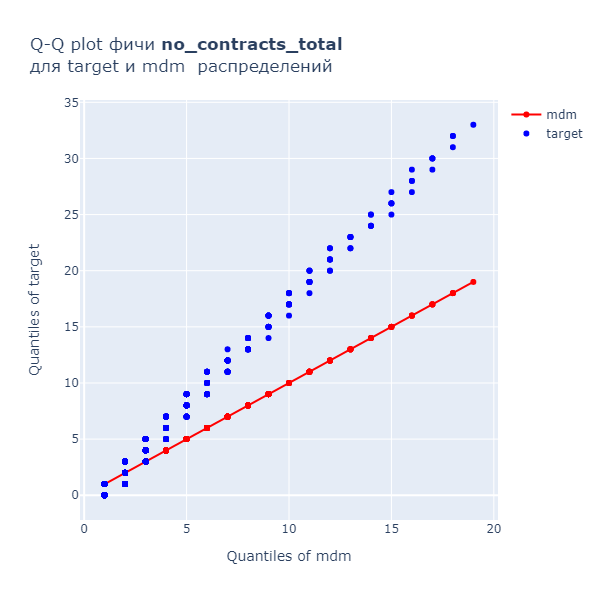

In [25]:
percentile_max = min(95+1, 100)

list_of_figs = []

for feature, featureProperty in tqdm(allFeaturesProperties.items()):
    
    set_target = features_target[feature].values

    set_mdm = features_mdm[feature].values

    df_pct = pd.DataFrame()
    percentiles = np.array(range(percentile_max*10))/10
    df_pct['target'] = np.percentile(set_target, percentiles)
    df_pct['mdm'] = np.percentile(set_mdm, percentiles)
    df_pct['percentile'] = percentiles

    title = 'Q-Q plot фичи <b>{}</b>'.format(feature)+ '<br>'+'для target и mdm  распределений'
    x_title = "Quantiles of {}".format('mdm')
    y_title = "Quantiles of {}".format('target')

    fig = plot_qqplot(df_pct,  'mdm', 'target', title=title, x_title=x_title, y_title=y_title)

    list_of_figs.append(fig)

combine_plotly_figs_to_html(list_of_figs, pre+'data/html/q_q_representativeness_temp.html')
list_of_figs[0].show('png' if need_svg else '')

In [26]:
print('будут рассчитаны только для тех, у которых есть закрытые сделки ') 
[feature for feature, featureProperty in allFeaturesProperties.items() if featureProperty['for_closed']]

будут рассчитаны только для тех, у которых есть закрытые сделки 


['reason_завершение',
 'reason_замена/перенайм/переуступка',
 'reason_не указана',
 'reason_определена цессия',
 'reason_отмена',
 'reason_расторгнут',
 'reason_страховой случай',
 'reason_страховой случай (гибель/тотал)',
 'reason_гибель/тотал',
 'bad_reasons_closed',
 'good_reasons_closed',
 'not_determined_reasons_closed',
 'mean_bad_reasons',
 'mean_good_reasons',
 'mean_not_determined_reasons',
 'duration_max',
 'duration_min',
 'duration_mean',
 'end_date_last',
 'end_date_first']

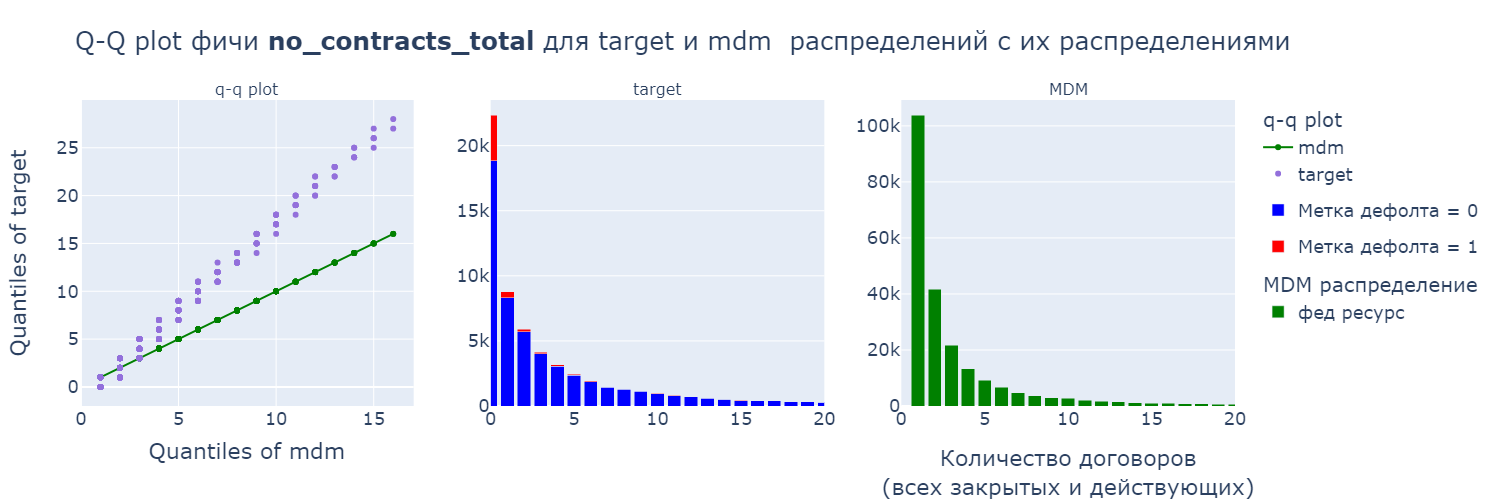

In [27]:
x_ranges = {'no_contracts_active': [0, 20], 
'no_transp_active' : [0, 20], 
'no_contracts_total':[0, 20], 
'no_transport_total' : [0, 20], 
'no_contracts_closed' : [0, 20], 
'reason_гибель/тотал' : [0, 0.1],
'reason_завершение' : [0, 10], 
'reason_замена/перенайм/переуступка' : [0, 0.06],
'reason_не указана' : [0, 10], 
'reason_определена цессия' : [0, 0.6], 
'reason_отмена' : [0, 3],
'reason_расторгнут' : [0, 2], 
'reason_страховой случай' : [0, 0.6],
'reason_страховой случай (гибель/тотал)' : [0, 0.04], 
'bad_reasons_closed' : [0, 2],
'good_reasons_closed' : [0, 10], 
'not_determined_reasons_closed' : [0, 14],
'mean_bad_reasons' : [0, 1], 
'mean_good_reasons' : [0, 1], 
'mean_not_determined_reasons' : [0, 1],
'no_creditors' : [0, 7], 
'duration_max' : [0, 1500], 
'duration_mean' : [0, 1000], 
'duration_min' : [0, 1000],
'contract_date_delta_first' : [0, 2000], 
'contract_date_delta_last' : [0, 1000],
'end_date_first' : [0, 1500], 
'end_date_last' : [0, 600]
}

list_of_figs = []

for feature, featureProperty in allFeaturesProperties.items():

    feature_name = featureProperty['title']

    histogram = feature in ['mean_bad_reasons', 'mean_good_reasons', 'mean_not_determined_reasons', 
                            'duration_max', 'duration_mean', 'duration_min', 'contract_date_delta_first', 
                            'contract_date_delta_last', 'end_date_first', 'end_date_last']

    if featureProperty['for_closed']:
        df_target = features_target[features_target['no_contracts_closed']>0]
        df_mdm = features_mdm[features_mdm['no_contracts_closed']>0]
        # print(feature)
    elif feature in ['contract_date_delta_first', 'contract_date_delta_last']:
        df_target = features_target[features_target[feature]>0]
        df_mdm = features_mdm[features_mdm[feature]>0]
    else:
        df_target = features_target
        df_mdm = features_mdm

    log_scale = feature in ['mean_bad_reasons', 'mean_good_reasons', 'mean_not_determined_reasons']
    percentile_max = 100 if feature in ['reason_замена/перенайм/переуступка', 'reason_определена цессия', 
                                        'reason_расторгнут', 'reason_страховой случай', 'reason_страховой случай (гибель/тотал)', 
                                        'reason_гибель/тотал', 'bad_reasons_closed'] else 95

    set_target = df_target[feature].values
    set_mdm = df_mdm[feature].values

    df_pct = pd.DataFrame()
    percentiles = np.array(range(percentile_max*10))/10
    df_pct['target'] = np.percentile(set_target, percentiles)
    df_pct['mdm'] = np.percentile(set_mdm, percentiles)
    df_pct['percentile'] = percentiles

    title = 'Q-Q plot фичи <b>{}</b>'.format(feature)+ ' для target и mdm  распределений с их распределениями'
    x_title = "Quantiles of {}".format('mdm')
    y_title = "Quantiles of {}".format('target')
    name_theor, name_sample = 'mdm', 'target'
    x_range = x_ranges.get(feature)

    plots = [q_q_histogram, q_q_bar]
    func = 0 if histogram else 1
    fig = plots[func](df_pct, df_target, df_mdm, feature, name_theor, name_sample,  x_title = x_title, 
                        y_title = y_title, log_scale = log_scale, feature_name=feature_name, x_range = x_range, title = title)
    list_of_figs.append(fig)
    # fig.show()

combine_plotly_figs_to_html(list_of_figs, pre+'data/html/representativeness.html')
list_of_figs[0].show('png' if need_svg else '')

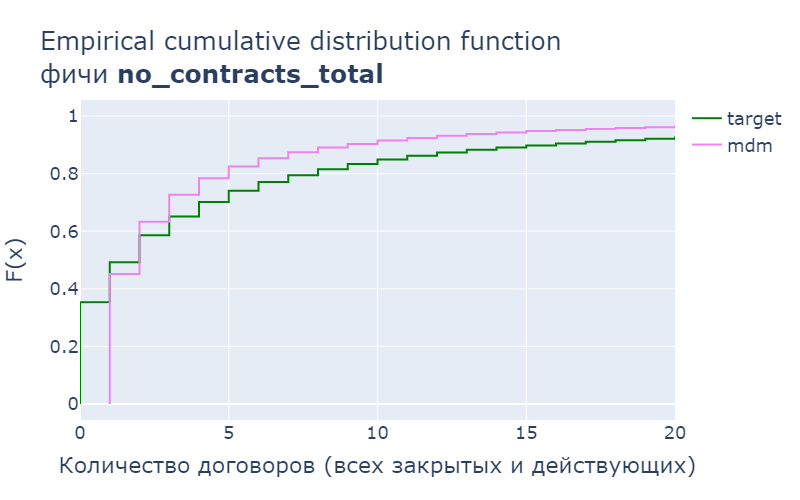

In [28]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_ranges = {'no_contracts_active': [0, 20], 
'no_transp_active' : [0, 20], 
'no_contracts_total':[0, 20], 
'no_transport_total' : [0, 20], 
'no_contracts_closed' : [0, 20], 
'reason_гибель/тотал' : [0, 0.1],
'reason_завершение' : [0, 10], 
'reason_замена/перенайм/переуступка' : [0, 0.06],
'reason_не указана' : [0, 10], 
'reason_определена цессия' : [0, 0.6], 
'reason_отмена' : [0, 3],
'reason_расторгнут' : [0, 2], 
'reason_страховой случай' : [0, 0.6],
'reason_страховой случай (гибель/тотал)' : [0, 0.04], 
'bad_reasons_closed' : [0, 2],
'good_reasons_closed' : [0, 10], 
'not_determined_reasons_closed' : [0, 14],
'mean_bad_reasons' : [0, 1], 
'mean_good_reasons' : [0, 1], 
'mean_not_determined_reasons' : [0, 1],
'no_creditors' : [0, 7], 
'duration_max' : [0, 1500], 
'duration_mean' : [0, 1000], 
'duration_min' : [0, 1000],
'contract_date_delta_first' : [0, 2000], 
'contract_date_delta_last' : [0, 1000],
'end_date_first' : [0, 1500], 
'end_date_last' : [0, 600]
}

list_of_figs = []
for feature, featureProperty in allFeaturesProperties.items():

    feature_name = featureProperty['short_name']

    histogram = feature in ['mean_bad_reasons', 'mean_good_reasons', 'mean_not_determined_reasons', 
                            'duration_max', 'duration_mean', 'duration_min', 'contract_date_delta_first', 
                            'contract_date_delta_last', 'end_date_first', 'end_date_last']

    if featureProperty['for_closed']:
        df_target = features_target[features_target['no_contracts_closed']>0]
        df_mdm = features_mdm[features_mdm['no_contracts_closed']>0]

    elif feature in ['contract_date_delta_first', 'contract_date_delta_last']:
        df_target = features_target[features_target[feature]>0]
        df_mdm = features_mdm[features_mdm[feature]>0]
    else:
        df_target = features_target
        df_mdm = features_mdm

    set_target = df_target[feature].values
    set_mdm = df_mdm[feature].values

    x_range = x_ranges.get(feature)
    title = 'Empirical cumulative distribution function'+ '<br>'+'фичи <b>{}</b>'.format(feature)


    x_target, count_target = ecdf(df_target[feature])
    x_mdm, count_mdm= ecdf(df_mdm[feature])
    fig = ecdf_plot(x_target, count_target, x_mdm, count_mdm, feature, feature_name=feature_name, x_range = x_range, title = title)
    
    list_of_figs.append(fig)

combine_plotly_figs_to_html(list_of_figs, pre+'data/html/ecdf.html')
list_of_figs[0].show('png' if need_svg else '')

### Проверка репрезентативности с помощью PSI

In [29]:
def get_num_groups_wanted_mdm(feature):
    if feature in [ 'reason_страховой случай (гибель/тотал)']: 
        num_groups_wanted = 100000 # 0.001%
    elif feature in ['reason_гибель/тотал', 'reason_замена/перенайм/переуступка', ] :
        num_groups_wanted = 20000 # 0.005%
    elif feature in ['reason_определена цессия',  ]: 
        num_groups_wanted = 5000 # 0.02%
    elif feature in [ 'bad_reasons_closed',]: 
        num_groups_wanted = 1000 # 0.1%
    elif feature in ['reason_расторгнут',  'reason_страховой случай',] :
        num_groups_wanted = 200 # 0.5%
    elif feature in [ 'reason_отмена', 'mean_bad_reasons', 'mean_good_reasons', ] :
        num_groups_wanted = 100 # 1%
    elif feature in [ 'no_transp_active', 
                    'good_reasons_closed',  'reason_завершение', 'no_creditors'	]: 
        num_groups_wanted = 30 # 2%
    elif feature in [ 'contract_date_delta_first', 
                    'contract_date_delta_last', 'end_date_last', 'end_date_first'	]: 
        num_groups_wanted = 10 # 10%
    else: 
        num_groups_wanted = 20 # 5%
    return num_groups_wanted

In [30]:
'''код для подбора разбиения фичей'''
# base_data = features_mdm

# feature = 'mean_not_determined_reasons'

# num_groups_wanted = get_num_groups_wanted_mdm(feature)
# num_groups_wanted = 100 # 2%
# print(num_groups_wanted)
# bins = base_data[feature].quantile(np.array(range(0, num_groups_wanted+1))/num_groups_wanted).unique()
# bins.sort()

# n_bins = len(bins)

# binned1 = np.digitize(base_data[feature], bins)
# # bins = list(set(bins.astype(int)))
# prop1 = np.array([sum(binned1 == i) / len(binned1) for i in range(1, n_bins)])
# bins.sort()
# print(bins)
# print(prop1)

'код для подбора разбиения фичей'

In [31]:
bins_mdm = pd.DataFrame()

for feature, featureProperty in allFeaturesProperties.items():

    if featureProperty['for_closed']:
        base_data = features_mdm[features_mdm['no_contracts_closed']>0]
    elif feature in ['contract_date_delta_first', 'contract_date_delta_last']:
        base_data = features_mdm[features_mdm[feature]>0]
    else:
        base_data = features_mdm

    num_groups_wanted = get_num_groups_wanted_mdm(feature)

    bins = base_data[feature].quantile(np.array(range(0, num_groups_wanted+1))/num_groups_wanted).unique()
    if featureProperty['type'] != 'float': 
        bins = list(set(bins.astype(int)))

    bins.sort()
    n_bins = len(bins)

    binned1 = np.digitize(base_data[feature], bins)

    prop = np.array([round(sum(binned1 == i) / len(binned1)*100,2) for i in range(1, n_bins)])

    bins_mdm = bins_mdm.append(pd.DataFrame([{'feature':feature, 'n_bins':n_bins, 'bins':np.array(bins).round(2), 'Проценты в бине':prop}]))

bins_mdm.to_excel(writer, sheet_name='bins_mdm')
display_side_by_side(bins_mdm)

,feature,n_bins,bins,Проценты в бине
0,no_contracts_total,9,"[1, 2, 3, 4, 5, 6, 9, 16, 7249]","[45.14, 18.12, 9.4, 5.75, 4.02, 6.61, 5.73, 5.24]"
0,no_contracts_active,7,"[0, 1, 2, 3, 5, 9, 1767]","[39.51, 30.04, 11.17, 8.51, 5.54, 5.22]"
0,no_transport_total,9,"[0, 1, 2, 3, 4, 5, 7, 12, 7168]","[13.18, 41.33, 16.2, 8.02, 4.87, 5.63, 5.39, 5.38]"
0,no_transp_active,8,"[0, 1, 2, 3, 4, 5, 9, 1737]","[50.88, 25.87, 9.15, 4.07, 2.45, 4.04, 3.55]"
0,no_contracts_closed,7,"[0, 1, 2, 3, 5, 9, 5482]","[34.36, 33.59, 11.99, 9.18, 5.86, 5.01]"
0,reason_завершение,7,"[0, 1, 2, 3, 4, 6, 1391]","[48.48, 30.01, 9.45, 4.13, 3.71, 4.21]"
0,reason_замена/перенайм/переуступка,8,"[0, 1, 2, 3, 4, 5, 9, 29]","[99.89, 0.07, 0.02, 0.01, 0.0, 0.01, 0.01]"
0,reason_не указана,7,"[0, 1, 2, 3, 4, 6, 4861]","[37.41, 35.9, 11.21, 4.78, 4.55, 6.15]"
0,reason_определена цессия,15,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 22, 233]","[96.57, 2.27, 0.53, 0.21, 0.14, 0.07, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]"
0,reason_отмена,5,"[0, 1, 2, 3, 104]","[93.33, 4.29, 1.19, 1.18]"


In [32]:
target_data = target_frod.data

psi = pd.DataFrame()

base_data = features_mdm

for feature, featureProperty in allFeaturesProperties.items():

    bins = bins_mdm.loc[bins_mdm['feature']==feature, 'bins'][0]
    n_bins = len(bins)
    
    if featureProperty['for_closed']:
        data_test = features_target[features_target['no_contracts_closed']>0]
        base_data = features_mdm[features_mdm['no_contracts_closed']>0]
    elif feature in ['contract_date_delta_first', 'contract_date_delta_last']:
        data_test = features_target[features_target[feature]>0]
        base_data = features_mdm[features_mdm[feature]>0]
    else:
        data_test = features_target
        base_data = features_mdm

            
    binned1 = np.digitize(base_data[feature], bins)
    binned2 = np.digitize(data_test[feature], bins)

    # Вычисление долей объектов в каждом бине
    elipson=0.0001
    prop1 = np.array([sum(binned1 == i) / len(binned1) for i in range(1, n_bins)]) + elipson
    prop2 = np.array([sum(binned2 == i) / len(binned2) for i in range(1, n_bins)]) + elipson

    # Вычисление PSI
    psi_value = np.sum((prop1 - prop2) * np.log(prop1 / prop2))
    psi = psi.append(pd.DataFrame([{'psi_value':psi_value, 'feature':feature}]))


psi.to_pickle(pre+"data/interm/psi.pkl", compression={'method':'zip'})

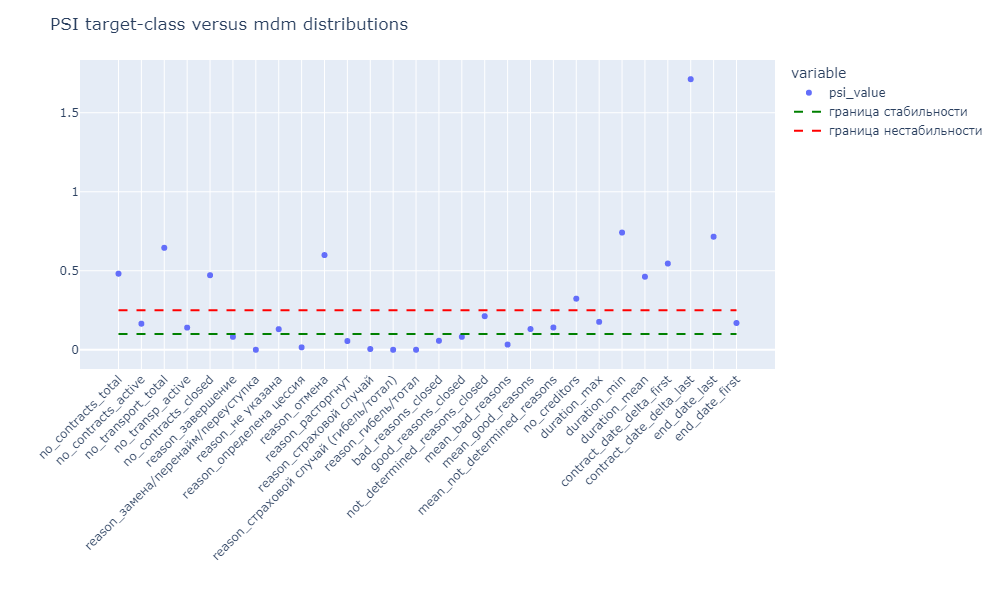

In [33]:
fig = plot_psi_features(psi)
combine_plotly_figs_to_html([fig], pre+'data/html/psi_representativeness.html')


In [34]:
# сохраняем tmp таблицы
if len(writer.sheets):
    writer.save()